In [115]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

df=pd.read_csv("enhanced_student_habits_performance_dataset.csv")
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84


In [116]:
valores_faltantes=df.isnull().sum()

valores_faltantes=valores_faltantes[valores_faltantes>0]
if valores_faltantes.empty:
    print("Não foram encontrados valores faltantes.")
else:
    print("Colunas com valores faltantes:\n",valores_faltantes)

Não foram encontrados valores faltantes.


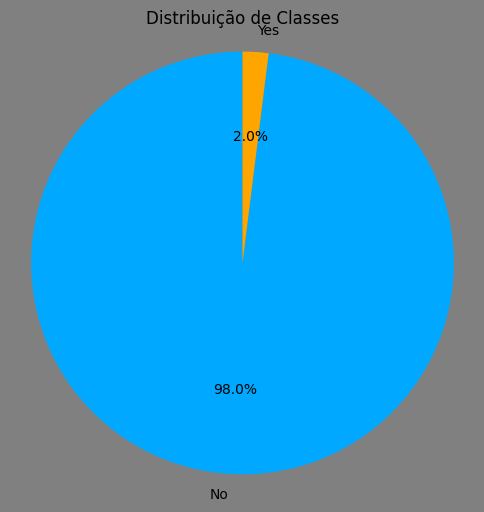

In [117]:
#plotando Distribuição de Classes
count = df['dropout_risk'].value_counts()

fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()

In [118]:
# Aleatória com 20% dos dados
df_sample = df.sample(frac=0.2, random_state=42)
df_sample

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
47044,147044,25,Other,Engineering,2.600000,4.8,2.5,Yes,43.3,7.9,...,11.1,Library,No,High,6,3,10,Kinesthetic,5.6,100
44295,144295,26,Female,Arts,3.200000,2.1,0.8,No,52.9,6.9,...,6.7,Co-Learning Group,Yes,Medium,8,5,10,Visual,2.3,79
74783,174783,22,Male,Psychology,4.500000,2.3,2.2,No,42.0,8.2,...,9.1,Cafe,No,High,2,3,10,Kinesthetic,9.3,66
70975,170975,22,Female,Computer Science,7.650183,1.2,2.0,No,87.4,8.4,...,11.2,Cafe,Yes,High,9,2,10,Visual,2.9,89
46645,146645,23,Male,Biology,3.900000,4.5,1.8,No,53.4,5.3,...,11.4,Quiet Room,Yes,High,10,1,10,Kinesthetic,3.0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67666,167666,22,Other,Biology,2.600000,3.8,3.9,No,77.5,6.4,...,12.2,Cafe,Yes,Medium,6,6,9,Visual,6.5,92
51146,151146,18,Male,Biology,4.600000,4.0,2.2,Yes,61.3,9.6,...,12.7,Cafe,No,High,4,8,7,Kinesthetic,8.9,78
42494,142494,26,Other,Arts,5.900000,3.3,2.9,No,85.8,7.6,...,13.2,Co-Learning Group,No,High,1,5,10,Reading,6.7,78
52517,152517,16,Female,Biology,3.900000,1.9,3.3,No,62.3,8.2,...,10.8,Library,Yes,High,8,10,5,Auditory,9.6,87


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [120]:
df = df.dropna()
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84


In [121]:
#Retirada de atributos que não tem relação com o ambiente que o aluno está inserido
df_sem_atributos = df.drop(columns=['student_id', 'major', 'age', 'gender', 'social_media_hours', 
                                    'netflix_hours','attendance_percentage','study_hours_per_day', 
                                    'learning_style','diet_quality', 'exercise_frequency',
                                     'time_management_score','semester', 'study_environment',
                                    'extracurricular_participation', 'previous_gpa', 'screen_time',
                                     'exam_score', 'semester' ])
display(df_sem_atributos.head(8))

print("Número de colunas:", df_sem_atributos.shape[1])

,part_time_job,sleep_hours,parental_education_level,internet_quality,mental_health_rating,stress_level,dropout_risk,social_activity,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score
0,Yes,6.2,Some College,High,6.0,5.8,No,0,Yes,High,9,7,8
1,No,7.2,PhD,Low,6.8,5.8,No,5,Yes,Low,7,2,10
2,No,9.2,High School,Low,5.7,8.0,No,5,Yes,High,3,9,6
3,Yes,4.2,Master,Medium,8.5,4.6,No,3,Yes,Low,5,3,10
4,Yes,6.5,PhD,Low,9.2,5.7,No,2,Yes,Medium,9,1,10
5,No,9.2,PhD,High,9.2,1.5,No,2,No,High,1,10,5
6,Yes,8.5,Some College,High,5.8,2.5,No,3,Yes,High,5,7,8
7,No,7.4,Master,High,4.8,5.3,No,3,Yes,Low,9,3,10


Número de colunas: 13


In [122]:
print("Tipos de dados antes da transformação: ")
print(df_sem_atributos.dtypes)

nao_numericos = df_sem_atributos.select_dtypes(include='object').columns.to_list()
numericos = df_sem_atributos.select_dtypes(include=['int64','float64'])

print(f"Colunas não numéricas: {nao_numericos}")
print(f"Colunas numéricas: {list(numericos)}")

Tipos de dados antes da transformação: 
part_time_job                object
sleep_hours                 float64
parental_education_level     object
internet_quality             object
mental_health_rating        float64
stress_level                float64
dropout_risk                 object
social_activity               int64
access_to_tutoring           object
family_income_range          object
parental_support_level        int64
motivation_level              int64
exam_anxiety_score            int64
dtype: object
Colunas não numéricas: ['part_time_job', 'parental_education_level', 'internet_quality', 'dropout_risk', 'access_to_tutoring', 'family_income_range']
Colunas numéricas: ['sleep_hours', 'mental_health_rating', 'stress_level', 'social_activity', 'parental_support_level', 'motivation_level', 'exam_anxiety_score']


In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

entradas = df_sem_atributos.drop('dropout_risk', axis='columns')
alvo = df['dropout_risk']

treinarEntradas, testarEntradas, treinarAlvo, testarAlvo = train_test_split(entradas, alvo, test_size=0.3)

trabalhoPeriodo = LabelEncoder()
horasSono = LabelEncoder()
educacaoPais = LabelEncoder()
qualidadeInternet = LabelEncoder()
saudeMental = LabelEncoder()
nivelEstresse = LabelEncoder()
atividadeSocial = LabelEncoder()
salarioFamilia = LabelEncoder()
apoioPais = LabelEncoder()
nivelMotivacao = LabelEncoder()
ansiedadeProva = LabelEncoder()

entradas['partTimeJob'] = trabalhoPeriodo.fit_transform(entradas['part_time_job'])
entradas['sleepHours'] = horasSono.fit_transform(entradas['sleep_hours'])
entradas['parentalEducationLevel'] = educacaoPais.fit_transform(entradas['parental_education_level'])
entradas['internetQuality'] = qualidadeInternet.fit_transform(entradas['internet_quality'])
entradas['mentalHealthRating'] = saudeMental.fit_transform(entradas['mental_health_rating'])
entradas['stressLevel'] = nivelEstresse.fit_transform(entradas['stress_level'])
entradas['socialActivity'] = atividadeSocial.fit_transform(entradas['social_activity'])
entradas['familyIncomeRange'] = salarioFamilia.fit_transform(entradas['family_income_range'])
entradas['parentalSupportLevel'] = apoioPais.fit_transform(entradas['parental_support_level'])
entradas['motivationLevel'] = nivelMotivacao.fit_transform(entradas['motivation_level'])
entradas['examAnxiety'] = ansiedadeProva.fit_transform(entradas['exam_anxiety_score'])

entradasNovas = entradas.drop(['part_time_job','sleep_hours','parental_education_level','internet_quality','mental_health_rating','stress_level',
                        'social_activity','access_to_tutoring','family_income_range','parental_support_level','motivation_level','exam_anxiety_score'], axis='columns')

entradasNovas


,partTimeJob,sleepHours,parentalEducationLevel,internetQuality,mentalHealthRating,stressLevel,socialActivity,familyIncomeRange,parentalSupportLevel,motivationLevel,examAnxiety
0,1,22,4,0,55,48,0,0,8,6,3
1,0,32,3,1,63,48,5,1,6,1,5
2,0,52,1,1,52,70,5,0,2,8,1
3,1,2,2,2,84,36,3,1,4,2,5
4,1,25,3,1,91,47,2,2,8,0,5
...,...,...,...,...,...,...,...,...,...,...,...
79995,1,21,1,2,0,11,1,1,0,3,5
79996,0,1,4,1,52,29,3,1,2,1,5
79997,1,43,2,1,62,46,3,2,6,0,5
79998,1,18,3,0,73,14,4,1,1,7,2


In [124]:
from sklearn.model_selection import train_test_split
from sklearn import tree

modelo = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(entradasNovas, alvo, test_size=0.3, random_state=42)
modelo.fit(X_train, y_train)
print("Acerto no treino:", modelo.score(X_train, y_train))
print("Acerto no teste:", modelo.score(X_test, y_test))

Acerto no treino: 1.0
Acerto no teste: 1.0


In [125]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)

clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [126]:
X_test

,partTimeJob,sleepHours,parentalEducationLevel,internetQuality,mentalHealthRating,stressLevel,socialActivity,familyIncomeRange,parentalSupportLevel,motivationLevel,examAnxiety
47044,1,39,0,1,55,69,5,0,5,2,5
44295,0,29,1,2,91,26,0,2,7,4,5
74783,0,42,1,1,41,44,3,0,1,2,5
70975,0,44,3,2,99,26,2,0,8,1,5
46645,0,13,2,1,63,41,4,0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...
79922,1,48,1,2,78,83,1,1,1,8,1
16599,1,56,3,1,72,40,3,2,8,8,1
42729,1,13,4,0,55,38,5,0,4,0,5
73134,0,0,4,0,49,61,5,0,4,9,0


In [131]:
previsao = clf.predict(X_test)
previsao

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(24000,), dtype=object)

In [130]:
modelo.score(entradasNovas, alvo)

1.0

In [132]:
dadosNovos = pd.DataFrame([{
    'partTimeJob': 1,
    'sleepHours': 1,
    'parentalEducationLevel': 1,
    'internetQuality': 1,
    'mentalHealthRating': 1,	
    'stressLevel': 1,
    'socialActivity': 1,
    'familyIncomeRange': 1,
    'parentalSupportLevel': 1,
    'motivationLevel': 1,
    'examAnxiety': 1,
}])

predict = modelo.predict(dadosNovos)
predict

array(['No'], dtype=object)